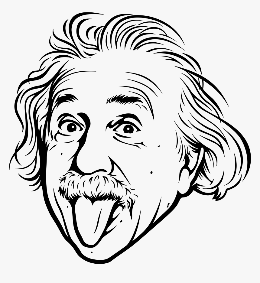

In [38]:
using ImageMagick, Images, ImageTransformations
im = Gray.(imresize(load("albert.png"), ratio=0.302))
img = Int.(round.(im))
display(imresize(im, ratio=1))

In [39]:
y = vcat(img...)
length(y)

73580

In [57]:
include("../../code/headers.jl")
q = 2
n = length(y)
R = reverse(0.2:0.2:0.8)
nrates = length(R)
m = Int.(round.(n*(1 .- R)))
seed = 234
algo = OptimalCycle()
algo = MS(maxiter=1000, gamma=1e-3, sigma=1e-10, Tmax=1)
compressed = [zeros(Int,n) for r in R]

nchunks = 4
@assert mod(n, nchunks)==0
@assert all([mod(mm, nchunks)==0 for mm in m])
chunk_length = div(n, nchunks)

lms = Vector{LossyModelGF2}(undef, nchunks)

4-element Array{LossyModelGF2,1}:
 #undef
 #undef
 #undef
 #undef

In [59]:
# for j in 1:nrates
#     println("-- Rate $j of $nrates: ")
#     lm = LossyModel(Val(q), n, m[j], y=y)
#     res = solve!(lm, algo, randseed=seed, verbose=true, showprogress=true)
#     compressed[j] = lm.x
# end

for j in 1:nrates
    println("-- Rate $j of $nrates: ")
    for c in 1:nchunks
        println("--- Chunk $c of $nchunks")
        lms[c] = LossyModel(Val(q), chunk_length, div(m[j], nchunks), y=y[(c-1)*chunk_length+1:c*chunk_length])
        res = solve!(lms[c], algo, randseed=seed, verbose=true, showprogress=true)
        compressed[j][(c-1)*chunk_length+1:c*chunk_length] = lms[c].x
    end
end

-- Rate 1 of 4: 
--- Chunk 1 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


--- Chunk 2 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


--- Chunk 3 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


--- Chunk 4 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:01


-- Rate 2 of 4: 
--- Chunk 1 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:02


--- Chunk 2 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:02


--- Chunk 3 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:02


--- Chunk 4 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:02


-- Rate 3 of 4: 
--- Chunk 1 of 4

--- Chunk 2 of 4

--- Chunk 3 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:02


--- Chunk 4 of 4

-- Rate 4 of 4: 
--- Chunk 1 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:03


--- Chunk 2 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:03


--- Chunk 3 of 4


Trial 1/1 100%|█████████████████████████████████████████| Time: 0:00:04


--- Chunk 4 of 4



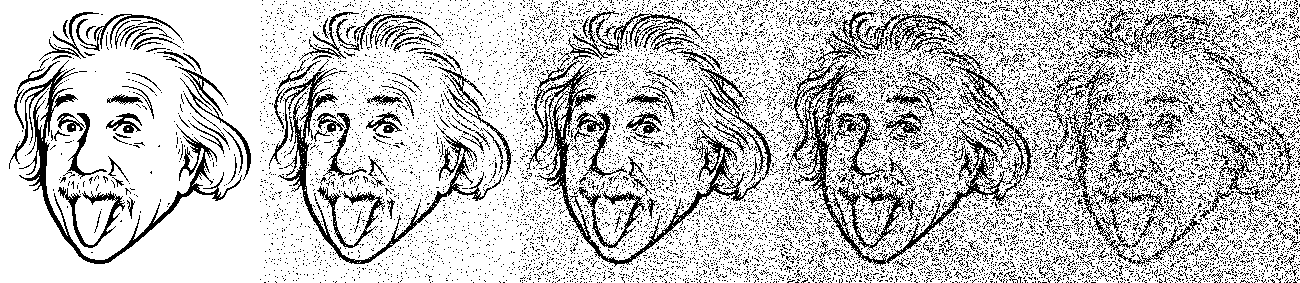

In [60]:
compressed_imgs = [reshape(x, size(im)) for x in compressed]
alberts = imresize(Gray.(hcat(img, compressed_imgs...)), ratio=1)

In [61]:
using FileIO
save("alberts.png", alberts)

0